# RNN Syntax Basics

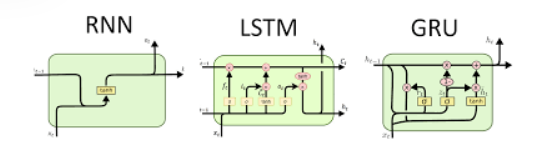

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

We will create our own data (sequence). We determined 501 numbers between 0 and 50 with linspace. We took the sin values ​​of these points and assigned these values ​​to y.

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

The maximum value of the sine function is 1 and its minimum value is -1.

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Our goal is to make a forecast by estimating the next values ​​of the dataset:

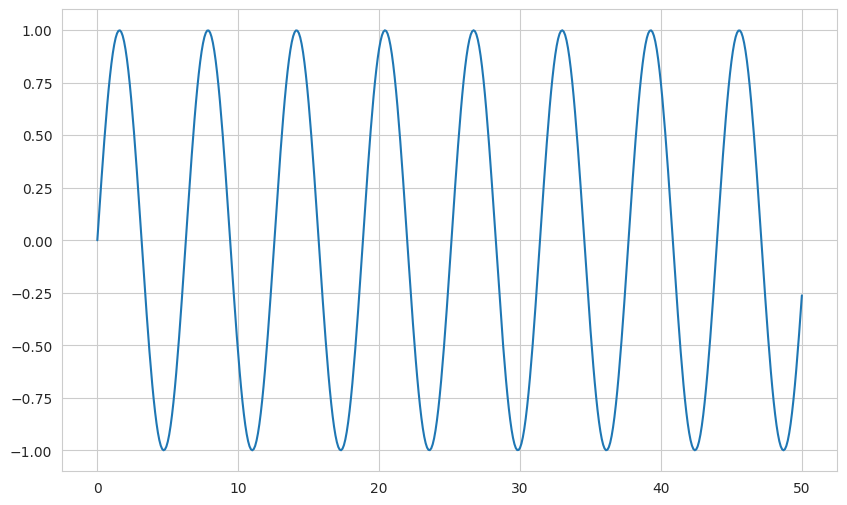

In [5]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

A dataframe with a single feature was created:

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


The variable 'x' represents the data used as the index, while the variable 'y' represents the data used as the 'Sine' column. This code aims to create a DataFrame using the 'y' data as the 'Sine' column and the 'x' data as the index.

## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

Up until now, we were doing a random division process while separating the test and train data. Here, we will not divide our data randomly because the order of our data is important. Therefore, we will separate a certain part from the last part of our data as test data.

In [9]:
test_percent = 0.15

The 15% part corresponds to the 75th index in our dataset:

In [10]:
len(df)*test_percent

75.14999999999999

To get rid of fractions, we assigned the length of the data up to 75 to a variable with round:

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0


If we subtract this value from the actual length of df, we are left with the data we will use for the train part. The data from the beginning to 426 will be the train data, and the rest will be the test data:

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

We took the part up to test_ind as train data and the part after test_ind as test data:

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train, test

(         Sine
 0.000   0.000
 0.100   0.100
 0.200   0.199
 0.300   0.296
 0.400   0.389
 ...       ...
 42.100 -0.952
 42.200 -0.978
 42.300 -0.994
 42.400 -1.000
 42.500 -0.996
 
 [426 rows x 1 columns],
          Sine
 42.600 -0.982
 42.700 -0.959
 42.800 -0.925
 42.900 -0.883
 43.000 -0.832
 ...       ...
 49.600 -0.617
 49.700 -0.536
 49.800 -0.449
 49.900 -0.357
 50.000 -0.262
 
 [75 rows x 1 columns])

### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [19]:
# Parametreler
length = 64  # Length of output arrays (number of time steps)
batch_size = 2  # Number of time series samples in each batch
stride = 2  # Period between consecutive output sequences

# Creating data and targets
data = []
targets = []

for i in range(0, len(train_scaled) - length + 1, stride):
    data.append(train_scaled[i:i+length])
    targets.append(train_scaled[i+length-1])

data = np.array(data)
targets = np.array(targets)

length = 64: Determines the length of each output sequence (date series or time series). This represents the number of time steps that each sample will contain.

batch_size = 2: Determines the number of time series samples to be used in each batch. That is, it determines the number of samples to be processed in each training step.

stride = 2: Determines the period between successive output sequences. This represents the amount of shift between time series samples in the dataset. That is, it specifies how many time steps there will be between successive samples.

data = [] and targets = []: Empty lists are created to store the data and target sequences.

for i in range(0, len(train_scaled) - length + 1, stride):: Loops over the train dataset. This loop navigates through the dataset, taking into account the length of the dataset, the specified period, and the specified length.

data.append(train_scaled[i:i+length]): In each iteration, data segments of the specified length are added to the data list. This creates each time series sample.

targets.append(train_scaled[i+length-1]): In the same iteration, the target value of each time series sample is added to the targets list. This uses the value of each time series sample at the last time step as the target.

data = np.array(data) and targets = np.array(targets): Finally, the created data and target arrays are converted to NumPy arrays. This allows for more efficient processing of the dataset.

In [20]:
print(data)

[[[4.99999116e-01]
  [5.49916225e-01]
  [5.99334579e-01]
  ...
  [4.08917133e-01]
  [4.58454081e-01]
  [5.08406134e-01]]

 [[5.99334579e-01]
  [6.47760405e-01]
  [6.94709850e-01]
  ...
  [5.08406134e-01]
  [5.58274186e-01]
  [6.07559973e-01]]

 [[6.94709850e-01]
  [7.39713809e-01]
  [7.82322618e-01]
  ...
  [6.07559973e-01]
  [6.55771048e-01]
  [7.02425701e-01]]

 ...

 [[2.67018944e-02]
  [1.29706884e-02]
  [4.10570950e-03]
  ...
  [6.39901882e-02]
  [4.17346643e-02]
  [2.40579672e-02]]

 [[4.10570950e-03]
  [1.95533568e-04]
  [1.27922981e-03]
  ...
  [2.40579672e-02]
  [1.11367167e-02]
  [3.10001778e-03]]

 [[1.27922981e-03]
  [7.34597031e-03]
  [1.83351382e-02]
  ...
  [3.10001778e-03]
  [2.81703720e-05]
  [1.95186738e-03]]]


In [21]:
print(targets)

[[5.08406134e-01]
 [6.07559973e-01]
 [7.02425701e-01]
 [7.89221319e-01]
 [8.64486561e-01]
 [9.25220839e-01]
 [9.69002868e-01]
 [9.94087198e-01]
 [9.99473795e-01]
 [9.84947913e-01]
 [9.51088653e-01]
 [8.99245876e-01]
 [8.31486391e-01]
 [7.50511555e-01]
 [6.59549578e-01]
 [5.62226827e-01]
 [4.62423254e-01]
 [3.64117712e-01]
 [2.71229333e-01]
 [1.87461283e-01]
 [1.16153131e-01]
 [6.01477060e-02]
 [2.16777691e-02]
 [2.27699490e-03]
 [2.71883099e-03]
 [2.29856628e-02]
 [6.22695157e-02]
 [1.19004266e-01]
 [1.90928079e-01]
 [2.75173579e-01]
 [3.68382164e-01]
 [4.66837901e-01]
 [5.66615671e-01]
 [6.63737650e-01]
 [7.54331889e-01]
 [8.34786684e-01]
 [9.01894555e-01]
 [9.52980122e-01]
 [9.86006767e-01]
 [9.99657820e-01]
 [9.93389058e-01]
 [9.67450395e-01]
 [9.22875925e-01]
 [8.61442691e-01]
 [7.85599843e-01]
 [6.98370994e-01]
 [6.03233685e-01]
 [5.03980740e-01]
 [4.04569059e-01]
 [3.08961874e-01]
 [2.20970741e-01]
 [1.44103589e-01]
 [8.14248677e-02]
 [3.54333813e-02]
 [7.96266464e-03]
 [1.078886

When you want to feed data directly to the RNN model without using a generator, you need to create the data and targets appropriately. In this case, you can use the data and targets lists to split the data into time series inputs and targets. Here is an example to illustrate this:

In [22]:
import numpy as np

# Örnek veri
train_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
length = 3  # Giriş uzunluğu

data1 = []
targets1 = []

# Veri ve hedef oluşturma
for i in range(len(train_data) - length):
    data1.append(train_data[i:i+length])
    targets1.append(train_data[i+length])

data = np.array(data1)
targets = np.array(targets1)

print("Data:")
print(data1)
print("Targets:")
print(targets1)


Data:
[array([0, 1, 2]), array([1, 2, 3]), array([2, 3, 4]), array([3, 4, 5]), array([4, 5, 6]), array([5, 6, 7]), array([6, 7, 8])]
Targets:
[3, 4, 5, 6, 7, 8, 9]


It creates data and targets using the elements in the train_data array. In each iteration, it creates a sub-array of length starting from the index i and adds this sub-array to the data list. Then, it adds the element at the index i+length to the targets list. In this way, the data and targets lists are created.

## Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [24]:
# We're only using one feature in our time series
n_features = 1

In [25]:
seed = 42

We added a hidden layer to the model.

units= 100 --> Let's say there are 100 neurons in the hidden layer.

input_shape=(length, n_features)) --> The first element gives the number of rows, the second element gives the number of columns. length=64 is the number of rows, n_features=1 is the number of columns.

model.add(Dense(units = 1)) --> There is 1 neuron in the output layer. (Since we are doing regression analysis, there should be a single neuron.)

RNN (Recurrent Neural Network) models usually use the loss metric instead of the accuracy metric. The reason for this is that RNN models are often used in data sets with continuous values ​​such as time series.

While the accuracy metric is used for classification problems, RNN models are usually used in regression problems. In regression problems, the target variables are continuous numerical values ​​and the aim is to estimate these values ​​directly. Therefore, loss metrics (mse, rmse, etc.) are usually used.

Both Hyperbolic Tangent (tanh) and ReLU (Rectified Linear Unit) activation functions can be used in recurrent neural networks (RNNs).

The hyperbolic tangent (tanh) function is a widely used activation function in RNNs. The tanh function limits the input values ​​between -1 and 1 and produces negative outputs for negative values, while it produces positive outputs for positive values. Therefore, it can be preferred to provide a suitable range for the values ​​of hidden states in RNNs.

The ReLU (Rectified Linear Unit) function is also an activation function that can be used in RNNs. The ReLU function outputs the same value if the input value is greater than 0, and zero if it is less than 0. The advantages of ReLU include high computational speed and the ability to spread the gradient smoothly.

Which activation function to use depends on your problem and the characteristics of your dataset. Both functions may be suitable for different situations, so it is important to try both tanh and ReLU functions in your RNNs to observe which one gives better results.

In [26]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

The input_shape parameter specifies the size of the input data. length represents the number of time steps in the input sequence, and n_features represents the number of features used at each time step.

There are too many parameters in the hidden layer. If we had built an ANN model, there would have been much fewer parameters. (If we had used LSTM instead of Simple RNN, we would have 4 layers of parameters because there are 4 gates):

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(data, targets, epochs=10, batch_size=batch_size)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42.2780
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5810 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7830 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2584 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6749 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1477 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8181 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7038 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0571 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4240 


Since we do not have validation data, we cannot see whether there is an overfit situation or not:

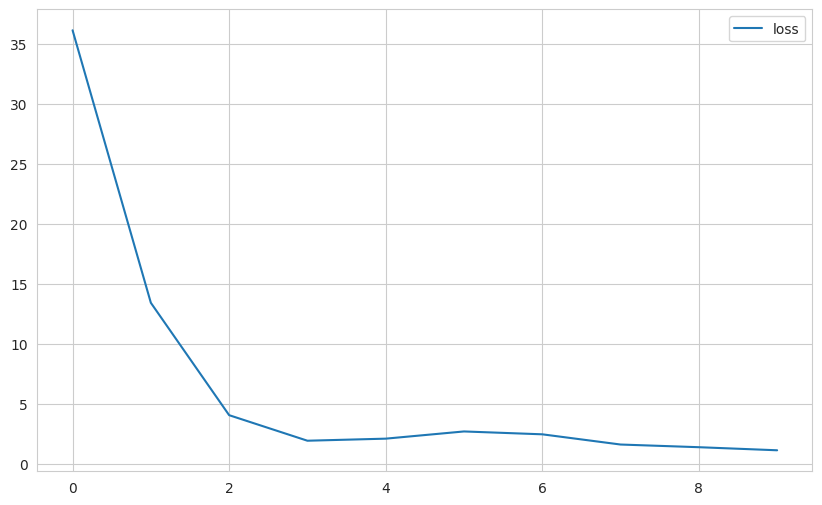

In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();